In [1]:
import numpy as np, matplotlib.pyplot as plt
import scipy.optimize as optimize
import matplotlib as mpl
from astropy.io import ascii as asc
from scipy.optimize import curve_fit

FULL_PATH = '/Users/kaitlynshin/GoogleDrive/NASA_Summer2015/'
CUTOFF_SIGMA = 4.0
CUTOFF_MASS = 6.0

In [2]:
# reading in data generated by EBV_corrections.py
corr_tbl = asc.read(FULL_PATH+'Main_Sequence/mainseq_corrections_tbl.txt',guess=False,
                Reader=asc.FixedWidthTwoLine)
zspec0 = np.array(corr_tbl['zspec0'])

stlr_mass = np.array(corr_tbl['stlr_mass'])
filts = np.array(corr_tbl['filt'])
obs_sfr = np.array(corr_tbl['obs_sfr'])
dust_corr_factor = np.array(corr_tbl['dust_corr_factor'])
filt_corr_factor = np.array(corr_tbl['filt_corr_factor'])
nii_ha_corr_factor = np.array(corr_tbl['nii_ha_corr_factor'])


# defining useful data structs for plotting
filtarr = np.array(['NB704,NB711', 'NB816', 'NB921', 'NB973'])
markarr = np.array(['o', '^', 'D', '*'])
sizearr = np.array([6.0, 6.0, 6.0, 9.0])**2

# defining an approximate redshift array for plot visualization
z_arr0 = np.array([7045.0, 7126.0, 8152.0, 9193.0, 9749.0])/6563.0 - 1
z_arr0 = np.around(z_arr0, 2)
z_arr  = np.array(z_arr0, dtype='|S9')
z_arr[0] = ",".join(z_arr[:2])
z_arr = np.delete(z_arr, 1)
z_arr  = np.array([x+'0' if len(x)==3 else x for x in z_arr])

# defining a flux sigma and mass cutoff
good_sig_iis = np.where((corr_tbl['flux_sigma'] >= CUTOFF_SIGMA) & (stlr_mass >= CUTOFF_MASS))[0]

corr_sfrs = obs_sfr+filt_corr_factor+nii_ha_corr_factor+dust_corr_factor

In [3]:
smass0 = np.array(corr_tbl['stlr_mass'])[good_sig_iis]

zspec0 = np.array(corr_tbl['zspec0'])[good_sig_iis]
no_spectra  = np.where((zspec0 <= 0) | (zspec0 > 9))[0]
yes_spectra = np.where((zspec0 >= 0) & (zspec0 < 9))[0]

badz_iis = np.array([x for x in range(len(zspec0)) if zspec0[x] < 0 or zspec0[x] > 9])
filt_lambda_list = {'NB704':7045.0, 'NB711':7126.0, 'NB816':8152.0, 'NB921':9193.0, 'NB973':9749.0}
ffs = filts[good_sig_iis]
for ff in filt_lambda_list.keys():
    badf_match = np.where(ffs[badz_iis] == ff)[0]
    zspec0[badz_iis[badf_match]] = (filt_lambda_list[ff]/6562.8) - 1

data00 = np.vstack([smass0, zspec0]).T

sfrs00 = corr_sfrs[good_sig_iis]

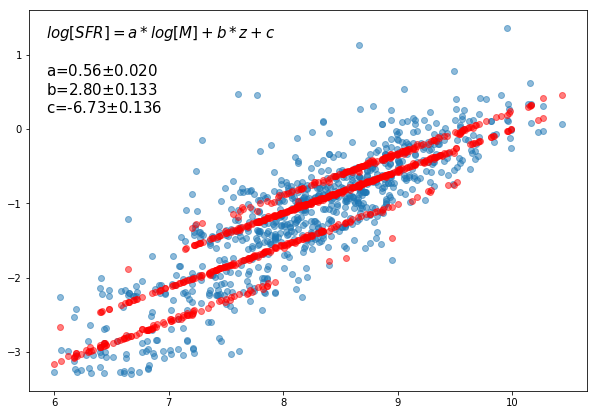

In [4]:
# assuming sfr = a*m + b*z + c
eqn0 = r'$log[SFR] = a*log[M] + b*z + c$'
def func0(data, a, b, c):
    return a*data[:,0] + b*data[:,1] + c

f, ax = plt.subplots()
params, pcov = optimize.curve_fit(func0, data00, sfrs00, method='lm')
perr = np.sqrt(np.diag(pcov))
ax.plot(smass0, sfrs00, 'o', alpha=0.5)
ax.plot(smass0, func0(data00, *params), 'ro', alpha=0.5)
ax.text(0.03,0.97,eqn0+
         '\n\na='+'{:.2f}'.format(params[0])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[0])+
         '\nb='+'{:.2f}'.format(params[1])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[1])+
         '\nc='+'{:.2f}'.format(params[2])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[2]),
         transform=ax.transAxes,fontsize=15,ha='left',va='top')

f.set_size_inches(10,7)

### plotting rms of SFR-M\* fit vs M\* in 0.5 bins

In [5]:
# defining an approximate redshift array for plot visualization
# z_arr0 = np.array([7045.0, 7126.0, 8152.0, 9193.0, 9749.0])/6563.0 - 1
# z_arr0 = np.around(z_arr0, 2)
# z_arr  = np.array(z_arr0, dtype='|S9')
# z_arr[0] = ",".join(z_arr[:2])
# z_arr = np.delete(z_arr, 1)
# z_arr  = np.array([x+'0' if len(x)==3 else x for x in z_arr])


# smass_all = np.array(corr_tbl['stlr_mass'])

# zspec_all = np.array(corr_tbl['zspec0'])
# badz_iis = np.array([x for x in range(len(zspec_all)) if zspec_all[x] < 0 or zspec_all[x] > 9])
# filt_lambda_list = {'NB704':7045.0, 'NB711':7126.0, 'NB816':8152.0, 'NB921':9193.0, 'NB973':9749.0}
# for ff in filt_lambda_list.keys():
#     badf_match = np.where(filts[badz_iis] == ff)[0]
#     zspec_all[badz_iis[badf_match]] = (filt_lambda_list[ff]/6562.8) - 1

# data_all = np.vstack([smass_all, zspec_all]).T

In [6]:
filts00 = filts[good_sig_iis]
markarr = np.array(['o', '^', 'D', '*'])
sizearr = np.array([6.0, 6.0, 6.0, 9.0])**2

mbins0 = np.arange(6.25, 10.75, .5)
bin_ii = np.digitize(smass0, mbins0)

In [7]:
len(smass0)

779

sigma = 0.2851
sigma = 0.2941
sigma = 0.3431
sigma = 0.3972
sigma = 0.3315
sigma = 0.3891
sigma = 0.3555
sigma = 0.2992
sigma = 0.3197


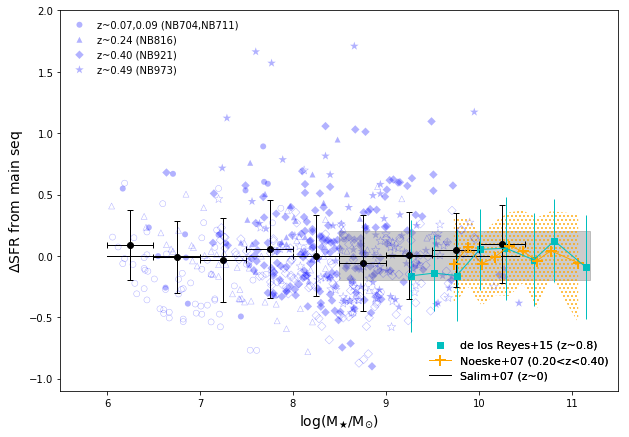

In [8]:
f, ax = plt.subplots()
params, pcov = optimize.curve_fit(func0, data00, sfrs00, method='lm')
sfrs_resid = sfrs00 - func0(data00, *params)
ax.plot(smass0, np.zeros(len(smass0)), 'k-')
for ff,mm,ll,size,avg_z in zip(['NB7', 'NB816', 'NB921', 'NB973'], markarr, 
                       ['NB704,NB711', 'NB816', 'NB921', 'NB973'], sizearr, z_arr):
    if 'NB7' in ff:
        filt_index_n = np.array([x for x in range(len(no_spectra)) if ff[:3] in filts00[no_spectra][x] 
            and no_spectra[x] in good_sig_iis])
        filt_index_y = np.array([x for x in range(len(yes_spectra)) if ff[:3] in filts00[yes_spectra][x]
            and yes_spectra[x] in good_sig_iis])
    else:
        filt_index_n = np.array([x for x in range(len(no_spectra)) if ff==filts00[no_spectra][x] 
            and no_spectra[x] in good_sig_iis])
        filt_index_y = np.array([x for x in range(len(yes_spectra)) if ff==filts00[yes_spectra][x]
            and yes_spectra[x] in good_sig_iis])


    ax.scatter(smass0[yes_spectra][filt_index_y],
               sfrs_resid[yes_spectra][filt_index_y], marker=mm,
               facecolors='blue', edgecolors='none', alpha=0.3,
               label='z~'+np.str(avg_z)+' ('+ll+')', s=size)

    ax.scatter(smass0[no_spectra][filt_index_n], 
                    sfrs_resid[no_spectra][filt_index_n],
                    marker=mm, facecolors='none', edgecolors='blue', alpha=0.3, 
                    linewidth=0.5, zorder=3, s=size)

for i in range(len(mbins0)):
    bin_match = np.where(bin_ii == i)[0]
    ax.plot(mbins0[i], np.mean(sfrs_resid[bin_match]), 'ko')
    ax.errorbar(mbins0[i], np.mean(sfrs_resid[bin_match]), xerr=0.25, yerr=np.std(sfrs_resid[bin_match]),
                capsize=3, color='k')
    print 'sigma =',str(np.round(np.std(sfrs_resid[bin_match]), 4))

# salim07
xarr = np.arange(8.5, 11.2, 0.01)
plt.fill_between(xarr, -np.array([0.2]*len(xarr)), np.array([0.2]*len(xarr)), color='gray', alpha=0.4)

# delosreyes15
def delosreyes_fit(mass):
    return 0.75*mass - 6.73
dlr_xarr = np.array([9.27, 9.52, 9.76, 10.01, 10.29, 10.59, 10.81, 11.15])
dlr_yarr = np.array([0.06, 0.27, 0.43, 0.83, 1.05, 1.18, 1.50, 1.54])
dlr_yerr = np.array([0.454, 0.313, 0.373, 0.329, 0.419, 0.379, 0.337, 0.424])
ax.errorbar(dlr_xarr, dlr_yarr - delosreyes_fit(dlr_xarr), dlr_yerr, fmt='c', ecolor='c', zorder=2) 
ax.scatter(dlr_xarr, dlr_yarr - delosreyes_fit(dlr_xarr), color='c', marker='s', zorder=2)

# noeske07
# def noeske_fit(mass):
#     return 0.67*mass - 6.19
def line(mass, a, b):
    return a*mass + b
noeske = asc.read(FULL_PATH+'Main_Sequence/Noeske07_fig1_z1.txt',guess=False,
                  Reader=asc.NoHeader)
logM   = np.array(noeske['col1'])
logSFR = np.array(noeske['col2'])
logSFR_low  = np.array(noeske['col3'])
logSFR_high = np.array(noeske['col4'])
params, pcov = curve_fit(line, logM, logSFR)
ax.fill_between(logM, logSFR_low-line(logM, *params), logSFR_high-line(logM, *params), facecolor='none',
                hatch=3*'.', edgecolor='orange', linewidth=0.0, zorder=1)
ax.plot(logM, logSFR - line(logM, *params), color='orange', marker='+', #linestyle='', 
        mew=2, markersize=11)

# first legend
legend1 = ax.legend(loc='upper left', frameon=False)
ax.add_artist(legend1)

# second legend
noeske, = ax.plot(-100,100,color='orange', marker='+',label='Noeske+07 (0.20<z<0.40)',mew=2,markersize=11)
delosreyes = ax.scatter(-100, 100, color='c', marker='s',label='de los Reyes+15 (z~0.8)', zorder=2)
salim, = ax.plot([-100, 100], [-100, 100], 'k-', label='Salim+07 (z~0)', zorder=1)
labelarr2 = np.array([delosreyes, noeske, salim])
legend2 = ax.legend(handles=list(labelarr2), loc='lower right', frameon=False,
                     fontsize=11, scatterpoints=1, numpoints=1)
ax.add_artist(legend2)

# final touches
ax.set_xlabel('log(M'+r'$_\bigstar$'+'/M'+r'$_{\odot}$'+')', size=14)
ax.set_ylabel(r'$\Delta$'+'SFR from main seq', size=14)
ax.set_xlim([5.5,11.5])
ax.set_ylim([-1.1,2.0])
f.set_size_inches(10,7)

In [12]:
intr = []
for i in range(len(mbins0)):
    bin_match = np.where(bin_ii == i)[0]
    print 'mass range:', mbins0[i]-0.25, '--', mbins0[i]+0.25
    
    plot_dispersion = np.round(np.std(sfrs_resid[bin_match]), 4)
    print 'observed_sigma =',str(plot_dispersion) #'plot_sigma'
    meas_dispersion = np.mean(corr_tbl['meas_errs'][bin_match].data)
    print 'systematic_sigma =',str(np.round(meas_dispersion, 4)) #'measured_sigma'
    intr_dispersion = np.sqrt(plot_dispersion**2 - meas_dispersion**2)
    intr.append(intr_dispersion)
    print 'intrinsic_sigma =',str(np.round(intr_dispersion, 4)), '\n'

mass range: 6.0 -- 6.5
observed_sigma = 0.2851
systematic_sigma = 0.1661
intrinsic_sigma = 0.2317 

mass range: 6.5 -- 7.0
observed_sigma = 0.2941
systematic_sigma = 0.2213
intrinsic_sigma = 0.1938 

mass range: 7.0 -- 7.5
observed_sigma = 0.3431
systematic_sigma = 0.1883
intrinsic_sigma = 0.2868 

mass range: 7.5 -- 8.0
observed_sigma = 0.3972
systematic_sigma = 0.2494
intrinsic_sigma = 0.3092 

mass range: 8.0 -- 8.5
observed_sigma = 0.3315
systematic_sigma = 0.2118
intrinsic_sigma = 0.2551 

mass range: 8.5 -- 9.0
observed_sigma = 0.3891
systematic_sigma = 0.2112
intrinsic_sigma = 0.3268 

mass range: 9.0 -- 9.5
observed_sigma = 0.3555
systematic_sigma = 0.207
intrinsic_sigma = 0.289 

mass range: 9.5 -- 10.0
observed_sigma = 0.2992
systematic_sigma = 0.179
intrinsic_sigma = 0.2398 

mass range: 10.0 -- 10.5
observed_sigma = 0.3197
systematic_sigma = 0.2209
intrinsic_sigma = 0.2311 



Text(0.5,1,'intrinsic dispersion')

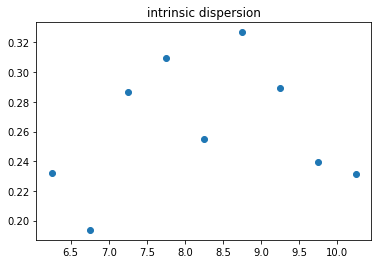

In [13]:
plt.plot(mbins0, intr, 'o', label='both')
plt.title('intrinsic dispersion')

$log[SFR] = a*log[M] + b*z + c$


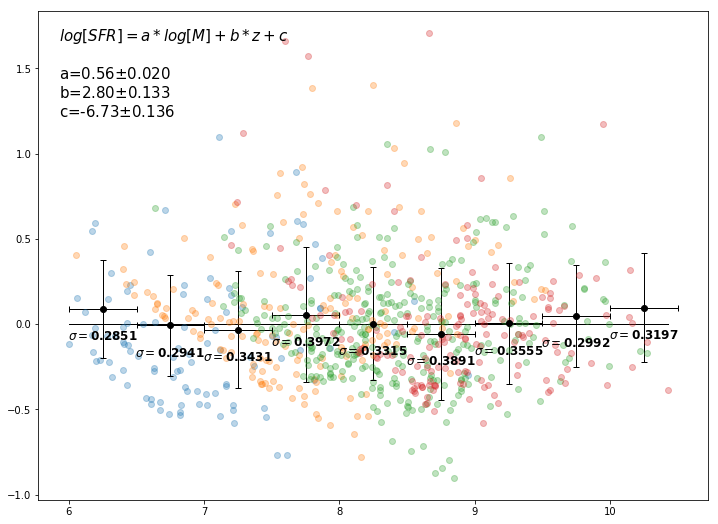

In [16]:
cwheel = [np.array(mpl.rcParams['axes.prop_cycle'])[x]['color'] for x in range(4)]
f, ax = plt.subplots(1,1)

guess = (0.8,1, -7)
func = func0
eqn_str = eqn0

print eqn_str
ax.plot(smass0, np.zeros(len(smass0)), 'k-')

sfrs_plot = np.array([])

params, pcov = optimize.curve_fit(func, data00, sfrs00, guess, method='trf')
perr = np.sqrt(np.diag(pcov))
sfrs_plot = sfrs00 - func(data00, *params)
ax.text(0.03,0.97,eqn_str+
    '\n\na='+'{:.2f}'.format(params[0])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[0])+
    '\nb='+'{:.2f}'.format(params[1])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[1])+
    '\nc='+'{:.2f}'.format(params[2])+r'$\pm$'+'{:.3f}'.format(np.sqrt(np.diag(pcov))[2]),
    transform=ax.transAxes,fontsize=15,ha='left',va='top')

    #     ax.plot(smass0, sfrs_plot, 'o', alpha=0.5)
for ff,cc,ll in zip(['NB7', 'NB816', 'NB921', 'NB973'], cwheel, ['NB704,NB711', 'NB816', 'NB921', 'NB973']):
    filt_match = np.array([x for x in range(len(filts99)) if ff in filts99[x]])
    ax.plot(smass0[filt_match], sfrs_plot[filt_match], 'o', color=cc, alpha=0.3, label=ll)

#     plt.xlabel('M')
#     plt.ylabel('sigma_rms')
#     plt.legend(loc='best')

for i in range(len(mbins0)):
    bin_match = np.where(bin_ii == i)[0]
    ax.plot(mbins0[i], np.mean(sfrs_plot[bin_match]), 'ko')
    ax.errorbar(mbins0[i], np.mean(sfrs_plot[bin_match]), xerr=0.25, yerr=np.std(sfrs_plot[bin_match]),
                capsize=3, color='k')
    ax.annotate(r'$\sigma=$'+str(np.round(np.std(sfrs_plot[bin_match]), 4)), 
                (mbins0[i], np.mean(sfrs_plot[bin_match])-0.2), 
                va='bottom', ha='center', fontsize=12, color='k', fontweight='bold')
#         print 'bin dispersion:', mbins[i], '|', np.std(sfrs_plot[bin_match])

f.set_size_inches(12,9)
# f.tight_layout()

### plotting rms of SFR-M\* fit vs SFR

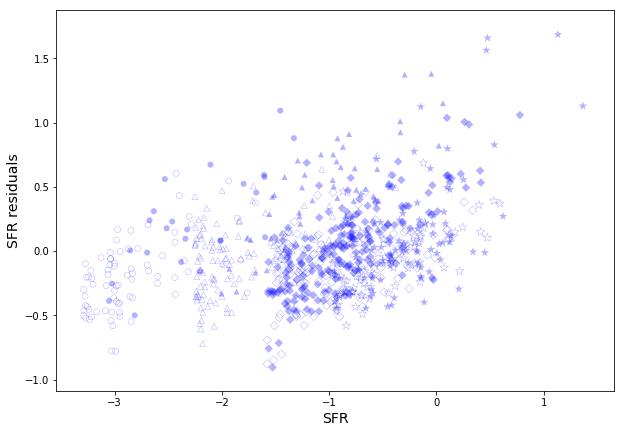

In [8]:
f, ax = plt.subplots()

for ff,mm,ll,size,avg_z in zip(['NB7', 'NB816', 'NB921', 'NB973'], markarr, 
                       ['NB704,NB711', 'NB816', 'NB921', 'NB973'], sizearr, z_arr):
    if 'NB7' in ff:
        filt_index_n = np.array([x for x in range(len(no_spectra)) if ff[:3] in filts[no_spectra][x] 
            and no_spectra[x] in good_sig_iis])
        filt_index_y = np.array([x for x in range(len(yes_spectra)) if ff[:3] in filts[yes_spectra][x]
            and yes_spectra[x] in good_sig_iis])
    else:
        filt_index_n = np.array([x for x in range(len(no_spectra)) if ff==filts[no_spectra][x] 
            and no_spectra[x] in good_sig_iis])
        filt_index_y = np.array([x for x in range(len(yes_spectra)) if ff==filts[yes_spectra][x]
            and yes_spectra[x] in good_sig_iis])


    ax.scatter(corr_sfrs[yes_spectra][filt_index_y],
               sfrs_resid[yes_spectra][filt_index_y], marker=mm,
               facecolors='blue', edgecolors='none', alpha=0.3,
               label='z~'+np.str(avg_z)+' ('+ll+')', s=size)

    ax.scatter(corr_sfrs[no_spectra][filt_index_n], 
                    sfrs_resid[no_spectra][filt_index_n],
                    marker=mm, facecolors='none', edgecolors='blue', alpha=0.3, 
                    linewidth=0.5, zorder=3, s=size)

# final touches
ax.set_xlabel('SFR', size=14)
ax.set_ylabel('SFR residuals', size=14)
f.set_size_inches(10,7)

In [ ]:
# take neg and pos errs, add in quadrature, multiply by 0.5, and that's your error for that galaxy
#  compute average based on that
# might be worthwhile to compute median 